In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom, norm
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 18

# The Central Limit Theorem and the Normal Approximation to the Binomial Distribution

## Learning Objectives
1. Understand the Central Limit Theorem (CLT)
1. Understand what type of random variables are distributed with Binomial and Bernoulli distributions
2. Understand what role that the CLT plays in the Normal Approximation to the Binomial Distribution

Let us first state in simple terms what we want to understand: *the CLT states that if we have a sample of n random variables (observations) all sampled from the same distribution with finite mean and variance, their mean tends to be normally distributed as the sample size grows.*
1. Since the sample proportion is calculated as a mean (sum of successes divided by sample size) then the sample proportion tends to be normally distributed as the sample size grows. 
2. The proportion is Binomially distributed but as the sample grows the Binomial distribtion gets closer and closer to a Normal distribution.

More precisely, take a sample of independent and identically distributed random variables $\{X_1, \ldots, X_n\}$, sampled from a distribution with finite mean $\mu$ and variance $\sigma^2$. For large $n$ the mean $(X_1 + \ldots + X_n) / n$ gets closer to a Normal distribution with mean $\mu$ and variance $\sigma^2/n$. **Note** that this is true irrespective of the distribution of the $X_i$ which makes the theorem a powerful tool.

## Example
Consider the following general problem setup:

We have a sample of $n$ observations from a population of individuals and we know if each observation has a feature or not. We can calculate the *proportion* "$p$" of observations that has the sought feature. For instance, we have a sample of 10 inviduals from the entire population, and we know if they are runners or not. Individuals that are runners count as "success". What is the distribution of "$p$"? Recall that the number of successes in $n$ observations is given by the **Binomial** distribution. The proportion $p$ is the number of successes divided by the sample size: $$p = \frac{\text{number of successes}}{n}$$
The number of successes is simply the count of observations with the sought feature. Each observation is a *random variable* $X$ since it may or may not be a success. The distribution of a random variable that can take only two values is the **Bernoulli** distribution. So far we have that: $$p = \frac{\overbrace{\text{number of successes}}^{\text{Binomial}}}{n} = \frac{\overbrace{X_1}^{\text{Bernoulli}} + \ldots + X_n}{n} = \text{prop. of success}$$

The Central Limit Theorem states that if we take a larger and larger sample size "$n$", the distribution of the average $$a = \frac{X_1 + \ldots + X_n}{n},$$ tends to a **Normal** distribution. Note that all the $X_i$ have the same distribution.

The CLT helps us in our case since the proportion is an average. The distribution of $p$ is the Binomial but as the sample grows, $p$ can be considered to be Normally distributed.

Consider the case where there is a $\pi$ = 50% chance that an individual is a runner. Then the distribution of the "number of successes" is $\sim Bin(n, \pi)$ with a standard deviation $\sigma = \sqrt{n\pi(1 - \pi)}$. Since the proportion is the number of successes divided by the sample size, we have that $p\sim Bin(n, \pi/n)$ with a standard deviation $\sigma_p = \sqrt{\pi (1 - \pi)/ n}$. If the sample size grows $\sigma_p$ gets smaller and we get closer to a Normal distribution with mean of $np$ and standard deviation of $\sqrt{np(1-p)}$.

Let's make an experiment. Take a Binomial random variable $Z$ with a sample size of 5 and then increase the sample size.

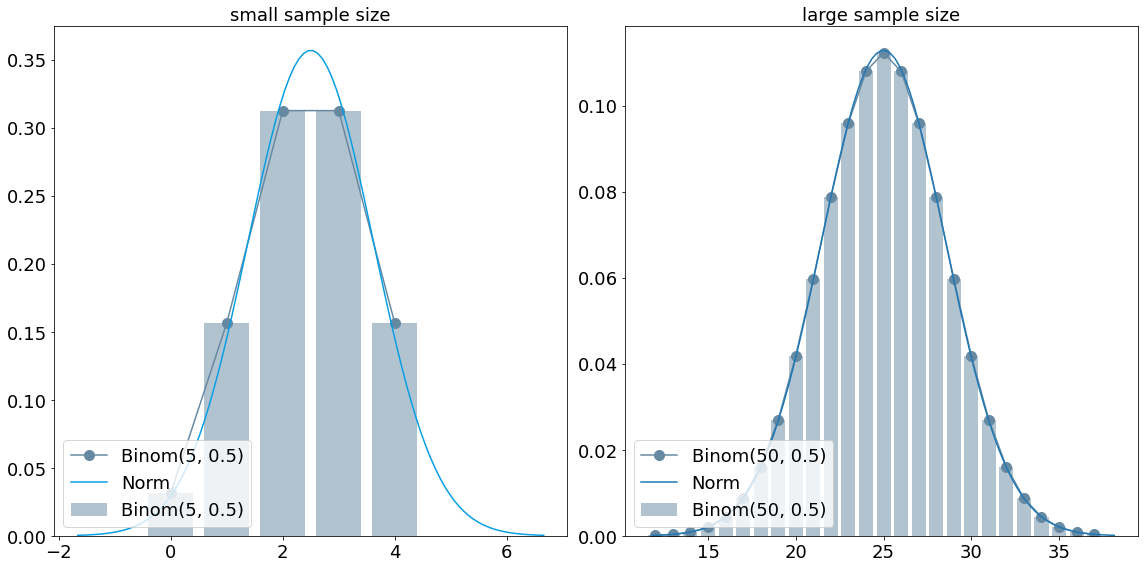

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
pi = .5
n=5
Z = binom(n, pi)    
x = np.arange(Z.ppf(0.0001), Z.ppf(0.9999)) 
ax[0].plot(x, Z.pmf(x), marker=".", markersize=20, color='#6689a2', label="Binom({}, 0.5)".format(n))
ax[0].bar(x, Z.pmf(x), alpha=0.5, label="Binom({}, 0.5)".format(n), color='#6689a2')

N = norm(n*pi, np.sqrt(n*pi*(1-pi)))
x = np.linspace(N.ppf(0.0001), N.ppf(0.9999), 100)
ax[0].plot(x, N.pdf(x), color='#079ee4', label="Norm")

n=50
Z = binom(n, pi)    
x = np.arange(Z.ppf(0.0001), Z.ppf(0.9999)) 
ax[1].plot(x, Z.pmf(x), marker=".", markersize=20, color='#6689a2', label="Binom({}, 0.5)".format(n))
ax[1].bar(x, Z.pmf(x), alpha=0.5,label="Binom({}, 0.5)".format(n), color="#6689a2")

N = norm(n*pi, np.sqrt(n*pi*(1-pi)))
x = np.linspace(N.ppf(0.0001), N.ppf(0.9999), 100)
ax[1].plot(x, N.pdf(x), label="Norm")

ax[1].set_title("large sample size", fontsize=18)
ax[0].set_title("small sample size", fontsize=18)
ax[0].legend(loc="lower left");
ax[1].legend(loc="lower left");
plt.tight_layout()
plt.savefig("Central_Limit_Theorem.png")
plt.show()


In the plot on the left, the binomial distribution is skewed and doesn't look Normal. Look at the "missing" last bar on the right side of the plot. As the sample size grows to 50 instead (plot on the right) the approximation is justified.

The CLT allows us to approximate the Binomial distribution witha Normal distribution if the sample size is sufficiently large. A commonly accepted rule to determine when the approximation is valid is to have both values of "np" and "n ( 1 − p )" are greater than or equal to 5.